In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# load Data
df_DA = pd.read_excel('./Data/DA_price_all.xlsx')

### Explorative Datenanalyse (EDA)

In [4]:
# infos about Data
df_DA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52608 entries, 0 to 52607
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      52608 non-null  datetime64[ns]
 1   DA_price  52608 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 822.1 KB


In [5]:
# Checking if there is NA Values in Data
df_DA['DA_price'].isna().value_counts()

DA_price
False    52608
Name: count, dtype: int64

In [6]:
# Set time column as Index column
df_DA.set_index('time', inplace=True)
df_DA.head()

,DA_price
time,
2019-01-01 00:00:00,28.32
2019-01-01 01:00:00,10.07
2019-01-01 02:00:00,-4.08
2019-01-01 03:00:00,-9.91
2019-01-01 04:00:00,-7.41


In [7]:
df_DA.describe().T

,count,mean,std,min,25%,50%,75%,max
DA_price,52608.0,95.649223,99.018746,-500.0,36.48,66.18,115.14,936.28


### Analysis

✅ Interpretation of the statistics:
count: 52,608 – There are 52,608 non-null values in the DA_price column.

mean: 95.65 €/MWh– The average price of electricity in the dataset is approximately 95.65.

std: 99.02 – The standard deviation is 99.02, indicating that the prices have significant variability.

min: -500.0 – The minimum price is -500.0, which is likely an outlier or erroneous data point (prices can't be negative in a typical market scenario).

25% (1st Quartile): 36.48 €/MWh– 25% of the prices are below 36.48.

50% (Median): 66.18 €/MWh– The median price (the middle value) is 66.18.

75% (3rd Quartile): 115.14 €/MWh– 75% of the prices are below 115.14.

max: 936.28 – The maximum price is 936.28 €/MWh, which might also indicate an outlier or a rare peak in price.

✅ Key Insights:
Negative Price: The presence of -500 as the minimum suggests there could be errors or data issues. Negative prices in electricity markets do occur, but they are rare and typically indicate oversupply situations.

High Variability: The large standard deviation relative to the mean shows a high level of fluctuation in prices, which is typical in electricity markets due to factors like demand, generation capacity, and weather.

Skewness: With a relatively high mean (93.91) compared to the median (66.18), the distribution could be right-skewed (i.e., there may be some very high prices driving the average up).

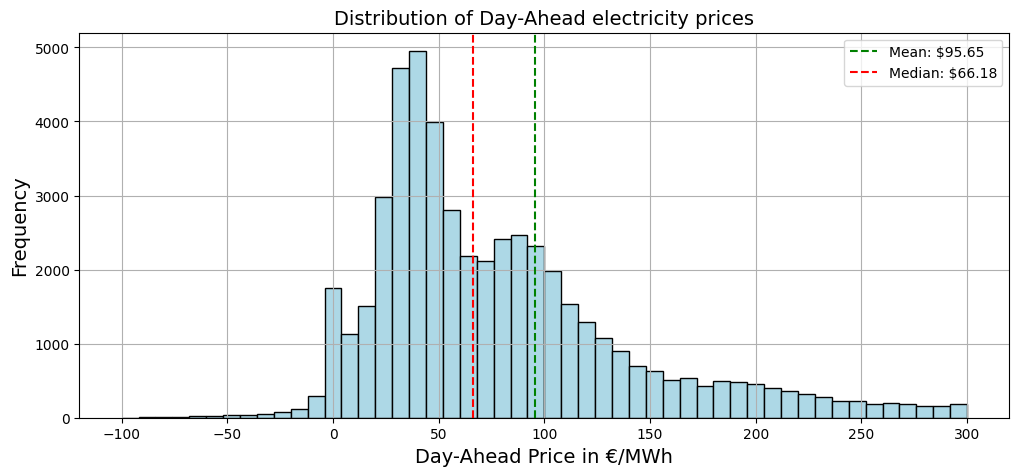

In [8]:
# histogram Day-Ahead Prices
mean_price = df_DA['DA_price'].mean()
median_price = df_DA['DA_price'].median()
df_DA.hist(bins=50, range=(-100, 300), figsize=(12, 5), color='lightblue', edgecolor='black')

# Add a vertical line at the mean price
plt.axvline(mean_price, color='green', linestyle='dashed', label=f'Mean: ${mean_price:,.2f}')
plt.axvline(median_price, color='red', linestyle='dashed', label=f'Median: ${median_price:,.2f}')

plt.title('Distribution of Day-Ahead electricity prices', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Day-Ahead Price in €/MWh', fontsize=14)
plt.legend()
plt.show()

#### Comment: Distribution of Price Data

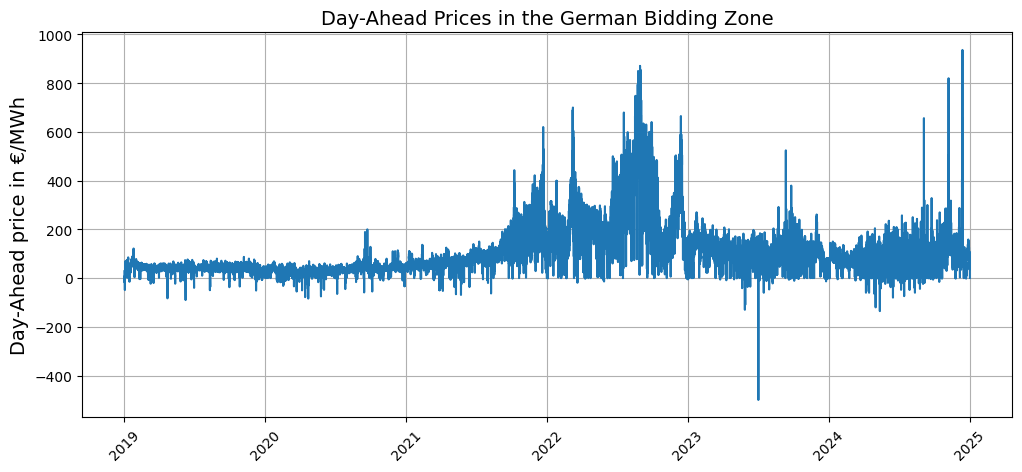

In [9]:
# Set figure size
plt.figure(figsize=(12, 5))

# Simple line plot using matplotlib
plt.plot(df_DA.index, df_DA['DA_price'])

# Add labels and title
plt.title('Day-Ahead Prices in the German Bidding Zone', fontsize=14)
plt.xlabel('')
plt.ylabel('Day-Ahead price in €/MWh', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

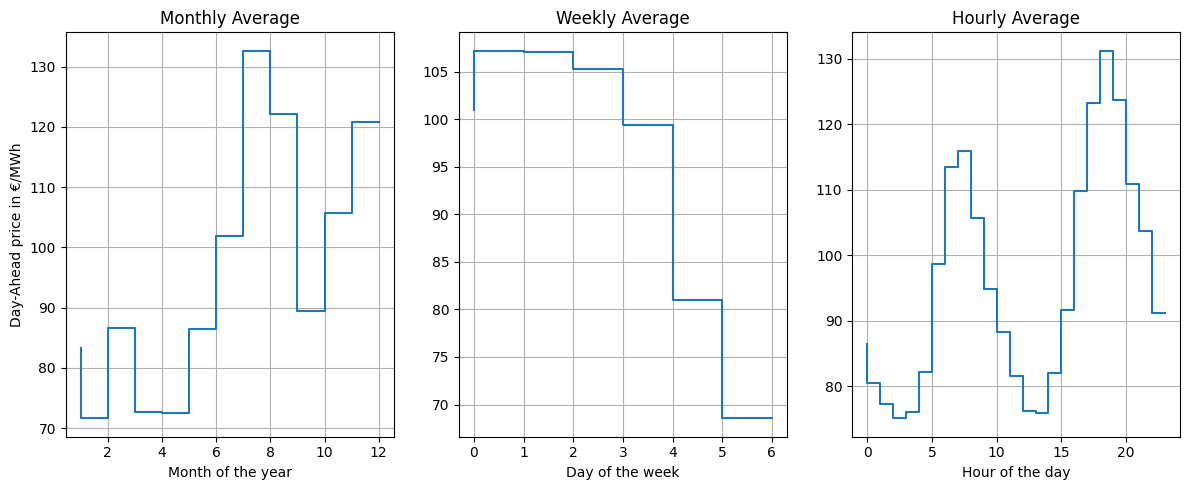

In [10]:
# Create the figure and axes (subplots)
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

# Plot 1: Monthly Average
monthly_avg = df_DA.groupby(df_DA.index.month).mean()
ax[0].plot(monthly_avg, drawstyle='steps-pre')
ax[0].set_title('Monthly Average')
ax[0].set_ylabel('Day-Ahead price in €/MWh')
ax[0].set_xlabel('Month of the year')
ax[0].grid(True)


# Plot 2: Weekly Average
weekly_avg = df_DA.groupby(df_DA.index.dayofweek).mean()
ax[1].plot(weekly_avg, drawstyle='steps-pre')
ax[1].set_title('Weekly Average')
ax[1].set_xlabel('Day of the week')
ax[1].grid(True)

# Plot 3: Hourly Average
hourly_avg = df_DA.groupby(df_DA.index.hour).mean()
ax[2].plot(hourly_avg, drawstyle='steps-pre')
ax[2].set_title('Hourly Average')
ax[2].set_xlabel('Hour of the day')
ax[2].grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()